In [1]:
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
## Word2vec
#import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [57]:
#data = pd.read_csv('twitter.csv', encoding='latin-1', names=["Target", "Ids", "Date", "Flag", "User", "Text"])
data = pd.read_csv('ten_percent_sample.csv')

In [58]:
#del data['Flag']

In [59]:
data.sample(10)

,Unnamed: 0,Target,Ids,Date,Flag,User,Text
131961,779698,NEGATIVE,2322989865,Wed Jun 24 23:41:03 PDT 2009,NO_QUERY,Kayteeee4,I just really need some motts applesauce
63097,929015,POSITIVE,1759816359,Sun May 10 20:01:44 PDT 2009,NO_QUERY,TheTerrordactyl,3 surgeries scheduled for tomorrow morning. Sh...
133877,1422140,POSITIVE,2058446859,Sat Jun 06 14:57:41 PDT 2009,NO_QUERY,TrueLiesMoon,Thks Max!!!! Happy!!!! Good night all
65995,1100007,POSITIVE,1970622012,Sat May 30 04:35:58 PDT 2009,NO_QUERY,ericyan390,going to my Aunt's graduation from cop school....
46708,518571,NEGATIVE,2191576163,Tue Jun 16 05:33:38 PDT 2009,NO_QUERY,elfinamsterdam,@ann_donnelly miss you too. work busy and got ...
102055,890668,POSITIVE,1688818104,Sun May 03 11:59:37 PDT 2009,NO_QUERY,twistedflatcat,Feel like carrying some furniture?
120916,1221808,POSITIVE,1990212890,Mon Jun 01 04:13:30 PDT 2009,NO_QUERY,lalunetropbleme,@Haiilee I'll come
152956,1041527,POSITIVE,1957088586,Thu May 28 23:29:11 PDT 2009,NO_QUERY,Kyyanno,And it's goodnight from me for the next few ho...
151154,1310023,POSITIVE,2013208952,Tue Jun 02 22:08:58 PDT 2009,NO_QUERY,thetrudz,Goodnight tweethearts.
114593,1356417,POSITIVE,2047747648,Fri Jun 05 14:07:05 PDT 2009,NO_QUERY,anika_2305,"Today was awesome, Jacob -what a beautiful nam..."


In [60]:
#List the number of missing values for each column.
#Iterate through each column vector to find the # of missing values
for row in data:
    value = data[row].isnull().sum()
    print("There are", value, " missing values in column",row)

There are 0  missing values in column Unnamed: 0
There are 0  missing values in column Target
There are 0  missing values in column Ids
There are 0  missing values in column Date
There are 0  missing values in column Flag
There are 0  missing values in column User
There are 0  missing values in column Text


In [61]:
#start cleaning refined dataset by removing duplicates
data = data.drop_duplicates(keep=False)

In [62]:
#decode_map = {0: "NEGATIVE", 4: "POSITIVE"}
#def decode_sentiment(label):
#    return decode_map[int(label)]

In [63]:
#data.Target = data.Target.apply(lambda x: decode_sentiment(x))

In [64]:
data.head()

,Unnamed: 0,Target,Ids,Date,Flag,User,Text
0,1349948,POSITIVE,2045384064,Fri Jun 05 10:38:53 PDT 2009,NO_QUERY,Erika_prettyE,@flyboizyes do ur thang
1,1159926,POSITIVE,1979388157,Sun May 31 02:50:00 PDT 2009,NO_QUERY,autojoy,@vivschwarz ooh! ooh! Are you playing Shadow o...
2,385699,NEGATIVE,2053658976,Sat Jun 06 05:17:53 PDT 2009,NO_QUERY,shuyi89,So i lied. I'm sorry..random stranger. I don't...
3,213614,NEGATIVE,1975048454,Sat May 30 14:20:19 PDT 2009,NO_QUERY,electricnet,"God dammit, Pixar. Five months difference betw..."
4,602448,NEGATIVE,2221398369,Thu Jun 18 05:18:28 PDT 2009,NO_QUERY,Catrheinland,Science revision!!! sooooooooo boring!!!!!


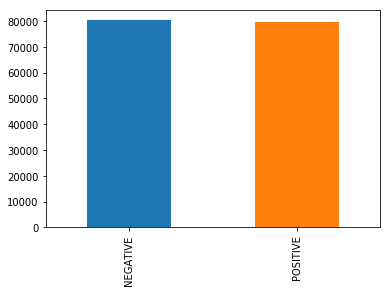

In [65]:
data['Target'].value_counts().plot('bar')

In [66]:
data['User'].value_counts()[0:10]

lost_dog           59
webwoke            45
VioletsCRUK        37
ramdomthoughts     33
shanajaca          29
Karen230683        27
SallytheShizzle    27
felicityfuller     27
DarkPiano          25
tweetpet           24
Name: User, dtype: int64

In [67]:
#ten_percent = data.sample(160000)



In [68]:
#ten_percent.to_csv("ten_percent_sample.csv")

In [69]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer


In [75]:
data.head()

,Unnamed: 0,Target,Ids,Date,Flag,User,Text
0,1349948,POSITIVE,2045384064,Fri Jun 05 10:38:53 PDT 2009,NO_QUERY,Erika_prettyE,@flyboizyes do ur thang
1,1159926,POSITIVE,1979388157,Sun May 31 02:50:00 PDT 2009,NO_QUERY,autojoy,@vivschwarz ooh! ooh! Are you playing Shadow o...
2,385699,NEGATIVE,2053658976,Sat Jun 06 05:17:53 PDT 2009,NO_QUERY,shuyi89,So i lied. I'm sorry..random stranger. I don't...
3,213614,NEGATIVE,1975048454,Sat May 30 14:20:19 PDT 2009,NO_QUERY,electricnet,"God dammit, Pixar. Five months difference betw..."
4,602448,NEGATIVE,2221398369,Thu Jun 18 05:18:28 PDT 2009,NO_QUERY,Catrheinland,Science revision!!! sooooooooo boring!!!!!


In [95]:
X = data.iloc[:,[6]]

df = pd.DataFrame(data=X)

df['User'] = data.iloc[:,[5]]

In [96]:
df.head()

,Text,User
0,@flyboizyes do ur thang,Erika_prettyE
1,@vivschwarz ooh! ooh! Are you playing Shadow o...,autojoy
2,So i lied. I'm sorry..random stranger. I don't...,shuyi89
3,"God dammit, Pixar. Five months difference betw...",electricnet
4,Science revision!!! sooooooooo boring!!!!!,Catrheinland


In [83]:

import warnings
warnings.filterwarnings('ignore')

# Text-preprocessing
# Missing Values
num_missing_desc = data.isnull().sum()[2]    # No. of values with msising descriptions
print('Number of missing values: ' + str(num_missing_desc))
data = data.dropna()

TAG_CLEANING_RE = "@\S+"
# Remove @tags
X['Text'] = X['Text'].map(lambda x: re.sub(TAG_CLEANING_RE, ' ', x))

# Smart lowercase
X['Text'] = X['Text'].map(lambda x: x.lower())

# Remove numbers
X['Text'] = X['Text'].map(lambda x: re.sub(r'\d+', ' ', x))

# Remove links
TEXT_CLEANING_RE = "https?:\S+|http?:\S|[^A-Za-z0-9]+"
X['Text'] = X['Text'].map(lambda x: re.sub(TEXT_CLEANING_RE, ' ', x))

# Remove Punctuation
X['Text']  = X['Text'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# Remove white spaces
X['Text'] = X['Text'].map(lambda x: x.strip())

# Tokenize into words
X['Text'] = X['Text'].map(lambda x: word_tokenize(x))
 
# Remove non alphabetic tokens
X['Text'] = X['Text'].map(lambda x: [word for word in x if word.isalpha()])

# Filter out stop words
# stop_words = set(stopwords.words('english'))
# X['Text'] = X['Text'].map(lambda x: [w for w in x if not w in stop_words])
    
# Word Lemmatization
lem = WordNetLemmatizer()
X['Text'] = X['Text'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

# Turn lists back to string
X['Text'] = X['Text'].map(lambda x: ' '.join(x))

Number of missing values: 0


In [85]:
X2 = X[X.Text != ""]

In [92]:
X2.head()

,Text,User,Sentiment
0,do ur thang,Erika_prettyE,Neutral
1,ooh ooh be you play shadow of the colossus one...,autojoy,Positive
2,so i lie i m sorry random stranger i don t mea...,shuyi89,Negative
3,god dammit pixar five months difference betwee...,electricnet,Negative
4,science revision sooooooooo bore,Catrheinland,Negative


In [88]:
len(sentiment)

159625

In [23]:
len(X)

159625

In [29]:
a = X2['Text'][0:159625]

In [30]:
from pycorenlp import StanfordCoreNLP


In [31]:
nlp = StanfordCoreNLP('http://localhost:9000')


In [32]:
sentiment = []
def get_sentiment(text):
    res = nlp.annotate(text,
                       properties={'annotators': 'sentiment',
                                   'outputFormat': 'json',
                                   'timeout':"100000",
                       })
    sentiment.append(res['sentences'][0]['sentiment'])


In [33]:
for x in a[0:159625]:
    get_sentiment(x)


In [34]:
len(sentiment)

159625

In [89]:
X2['Sentiment'] = sentiment

In [90]:
X2.to_csv('sent.csv')

In [ ]:
# nlp_run['standford_sentiment'] = sentiment


In [ ]:
# nlp_run.to_csv('nlp.csv')